In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Cobweb for logistic map:

$$x_{n+1} = r\cdot x_n(1-x_n)$$

$r\in (0,4)$

$x_n \in (0,1)$

In [2]:
def cobweb(f, x0, n,m, *args):
    """
        f - function, next value
        x0 - float, starting point
        n - int, number of iterations
        m - int, number of points for parabola / diagonal 
    """
    
    xx = np.linspace(0, 1, m)
    fx = f(xx, *args)
    gx = xx
    
    fig, ax = plt.subplots(figsize = (8,8))
    ax.set_ylabel('$x_{n+1}$')
    ax.set_xlabel('$x_n$')
    ax.set_xlim(-0.01, 1.01)
    ax.set_ylim(-0.01, 1.01)
    ax.grid(True, color = 'gray', alpha = 0.5)

    ax.plot(xx, gx, color = 'gray', linestyle='dashed')
    ax.plot(xx, fx, color = 'purple', linewidth=2)
    
    x, y = x0, f(x0, *args)
    ax.plot([x0, x0], [0,y], 'red', linewidth=1)
    for _ in range(n):
        fy = f(y, *args)        
        ax.plot([x, y], [y,  y], 'red', linewidth=1)
        ax.plot([y, y], [y, fy], 'red', linewidth=1)
        x, y = y, fy   

In [3]:
def logistic_map(x, r):
    return r*x*(1-x)

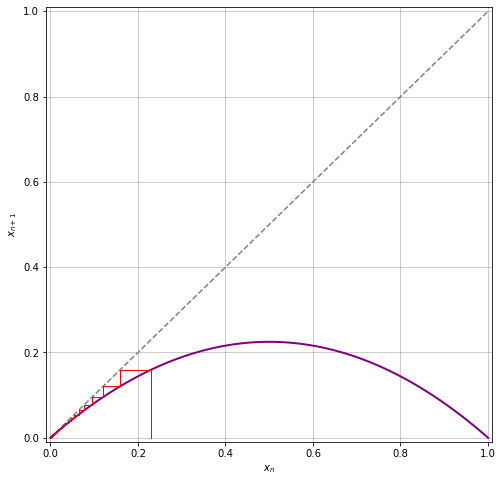

In [4]:
x0 = 0.23
n = 50
m = 100
r = 0.9

cobweb(logistic_map, x0, n, m, r)

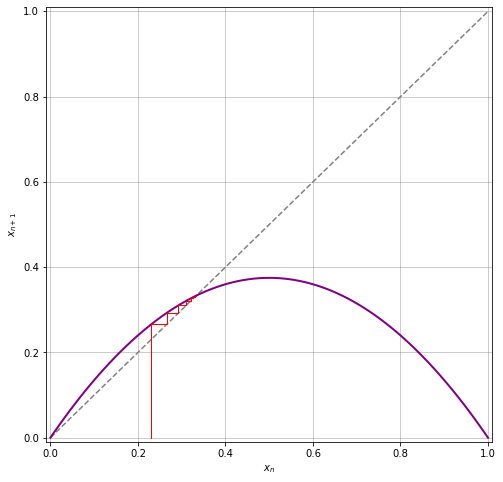

In [5]:
r = 1.5
cobweb(logistic_map, x0, n, m, r)

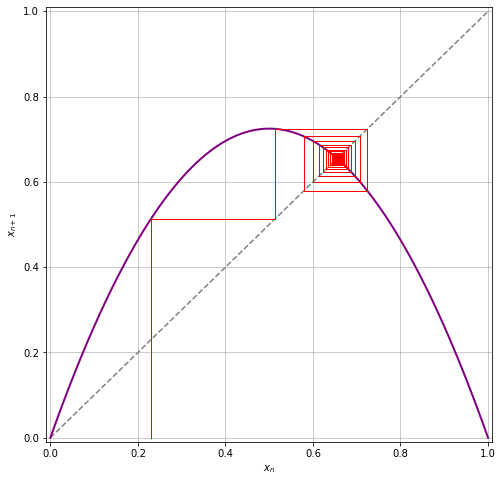

In [6]:
r = 2.9
cobweb(logistic_map, x0, n, m, r)

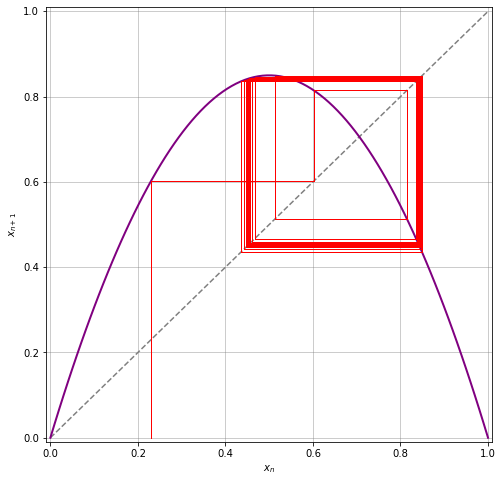

In [7]:
r = 3.4
cobweb(logistic_map, x0, n, m, r)

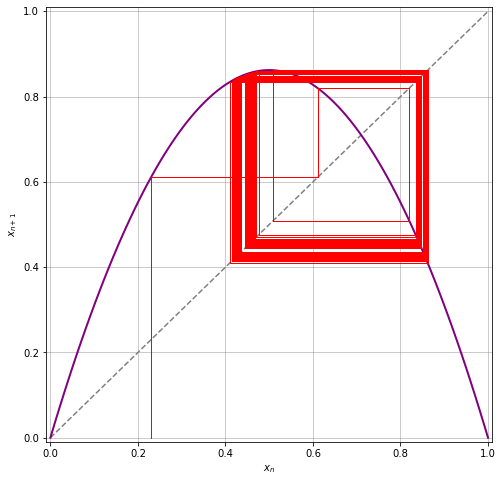

In [8]:
r = 1 + np.sqrt(6)
n=500
cobweb(logistic_map, x0, n, m, r)

# 2. Fixed Points

* period-1 orbits: $f(p) = p$

$$ f(p) = r\cdot p(1-p) = p$$

* period-2 orbits: $f(f(p)) = p$

$$ f(f(p)) = r\cdot rp(1-p)\cdot (1 - rp(1-p)) = p$$


* period-3 orbits: $f(f(f(p))) = p$

In [9]:
def plot_r(function, m,r_tab,xlim = 1.01, ylim = 1.01):

    color_tab = ['pink', 'deeppink', 'purple', 'blueviolet', 'blue', 'green', 'greenyellow', 'yellow', 'gold', 'orange']
    
    xx = np.linspace(0, 1, m)
    gx = xx
    
    fig, ax = plt.subplots(figsize = (8,6))
    ax.set_ylabel('$x_{n+1}$')
    ax.set_xlabel('$x_n$')   
    ax.set_xlim(-0.01, xlim)
    ax.set_ylim(-0.01, ylim)
    ax.grid(True, color = 'gray', alpha = 0.5)
    ax.plot(xx, gx, color = 'gray', linestyle='dashed')
    
    for i,r in enumerate(r_tab):
        fx = function(xx,r)        
        ax.plot(xx, fx, color = color_tab[i], linewidth=2, label = "r={:.2f}".format(r))
    ax.legend(loc = 'lower right')   

In [10]:
import sympy
from sympy import Function, Symbol

p = Symbol('p')
x = Symbol('x')
r = Symbol('r')

f = Function('f')

def f(x, r):
    return r*x*(1-x)

def f1(x,r):
    return  f(x,r)

def f2(x,r):
    return  f(f(x,r),r)

def f3(x,r):
    return  f(f(f(x,r),r),r)

def f4(x,r):
    return  f(f(f(f(x,r),r),r),r)

def f5(x,r):
    return  f(f(f(f(f(x,r),r),r),r),r)

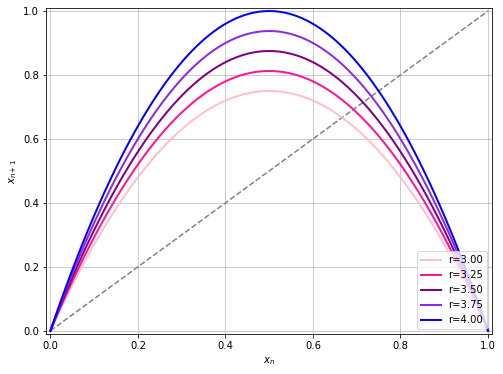

In [11]:
r_tab = [3.0, 3.25, 3.5, 3.75, 4.0]
plot_r(f1, m, r_tab)

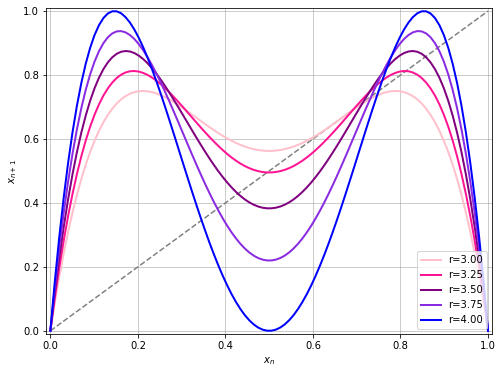

In [12]:
r_tab = [3.0, 3.25, 3.5, 3.75, 4.0]

plot_r(f2, m, r_tab)

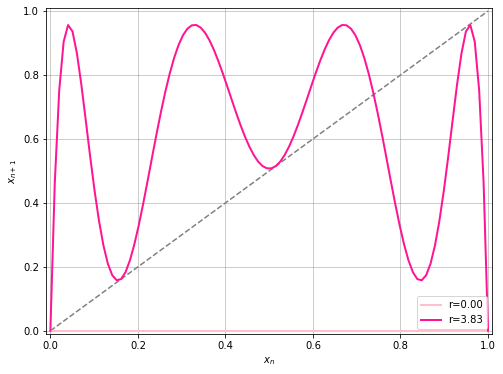

In [13]:
r_tab = [.0, 1 + np.sqrt(8)]

plot_r(f3, m, r_tab)

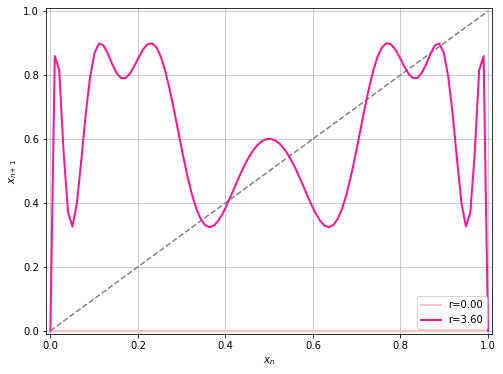

In [14]:
r_tab = [0., 3.6]

plot_r(f4, m, r_tab)

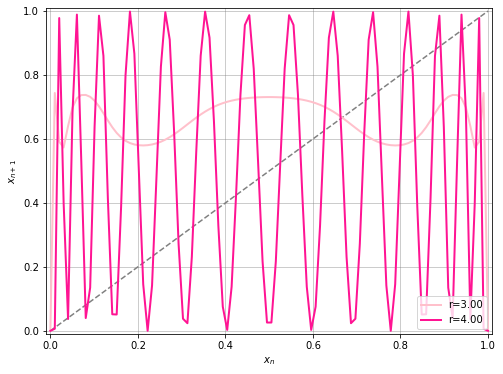

In [23]:
r_tab = [3,  4.0]

plot_r(f5, m, r_tab)

# 3.
Demonstrate, that $f(x) = r\left( 1-(2x-1)^4 \right)$ does not have a quadratic maximum
Solution:

$$f'(x) =0 \rightarrow x = 0.5$$
$$f''(x) =0 \rightarrow x = 0.5$$

The only extremas are saddle points, so $f(x)$ does not have any quadratic maximum.
$f(1/2) = r$

In [16]:
def g(x,r):
    return r*(1-(2*x-1)**4)

g(x,r)
g_prim = g(x,r).diff(x)
g_second = (g(x,r).diff(x)).diff(x)

In [17]:
sympy.solve(g_prim, x)

[1/2]

In [18]:
sympy.solve(g_second, x)

[1/2]

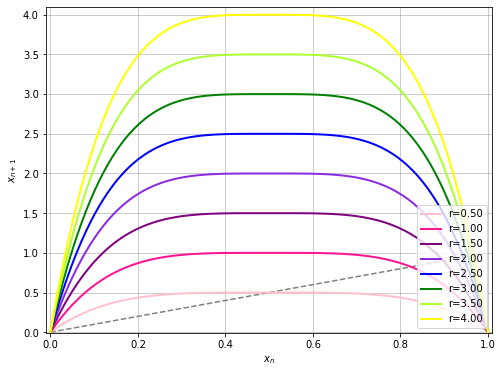

In [21]:
r_tab = [0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4]

plot_r(g, m, r_tab, ylim = 4.1)